<a href="https://colab.research.google.com/github/itrinia/code-TA/blob/main/ta_ileene_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kaggle api set up

In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ileenetrinia","key":"952ebd8e75b01c8ce4e3d354d8d22cc6"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ileenetrinia/docunet-sroie-merged --unzip

Dataset URL: https://www.kaggle.com/datasets/ileenetrinia/docunet-sroie-merged
License(s): other


# install numpy 1.24.3 to img aug

In [ ]:
!pip install numpy==1.24.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 68.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 w

In [ ]:
import numpy as np

In [ ]:
np.__version__

'1.24.3'

# load dataset

In [ ]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Path to image folders
sroie_folder = "/content/SROIE2019/train"
docunet_folder = "/content/DocUNet_dataset/image"

# Function to get image files from a folder
def get_images_from_folder(folder_path, valid_extensions=('.jpg', '.png', '.jpeg')):
    image_files = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(valid_extensions):
                image_files.append(os.path.join(root, file))
    return image_files

# Function to create a DataFrame from image files
def create_image_df(image_files):
    data = {
        'filename': [os.path.basename(f) for f in image_files],
        'filepath': image_files,
        'size': [os.path.getsize(f) for f in image_files],
        'dimensions': [Image.open(f).size for f in image_files]
    }
    return pd.DataFrame(data)

# Get image files and create DataFrames
sroie_image_files = get_images_from_folder(sroie_folder)
sroie_df = create_image_df(sroie_image_files)  # Create DataFrame for SROIE

docunet_image_files = get_images_from_folder(docunet_folder)
docunet_df = create_image_df(docunet_image_files) # Create DataFrame for DocUNet


# Now you can use head()
print("SROIE Dataset (Training Images):")
print(sroie_df.head(5))

print("\nDocUNet Dataset (Training Images):")
print(docunet_df.head(5))

SROIE Dataset (Training Images):
           filename                                       filepath     size  \
0  X51006414631.jpg  /content/SROIE2019/train/img/X51006414631.jpg  1441595   
1  X51005757346.jpg  /content/SROIE2019/train/img/X51005757346.jpg   409178   
2  X51005663276.jpg  /content/SROIE2019/train/img/X51005663276.jpg   539065   
3  X51006414700.jpg  /content/SROIE2019/train/img/X51006414700.jpg  2987461   
4  X51007846307.jpg  /content/SROIE2019/train/img/X51007846307.jpg  1629633   

     dimensions  
0  (4912, 6888)  
1   (708, 1302)  
2   (937, 1449)  
3  (4961, 7016)  
4  (4961, 7016)  

DocUNet Dataset (Training Images):
           filename                                         filepath    size  \
0  109-a652c7a6.png  /content/DocUNet_dataset/image/109-a652c7a6.png  350342   
1   11-2909d872.png   /content/DocUNet_dataset/image/11-2909d872.png  354616   
2  102-660099d4.png  /content/DocUNet_dataset/image/102-660099d4.png  376557   
3  106-d503e764.png  /conten

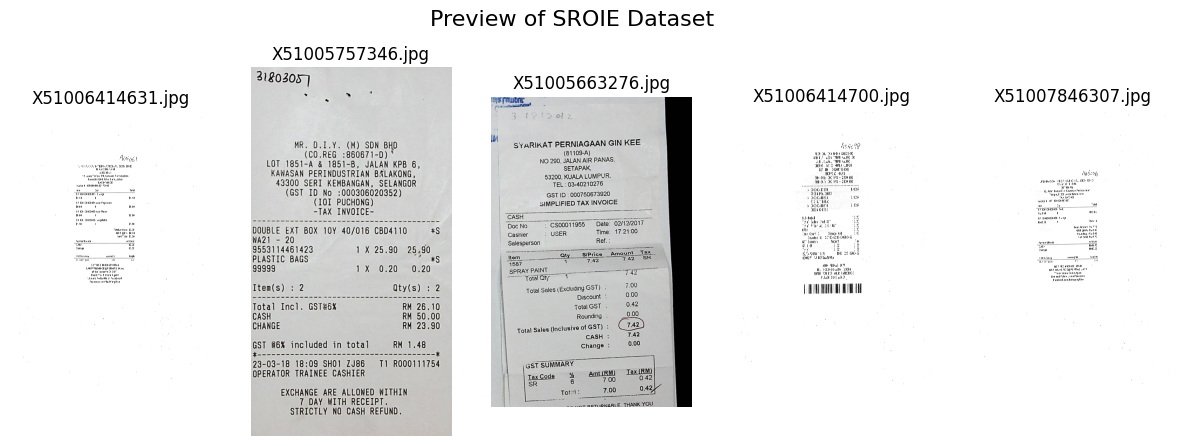

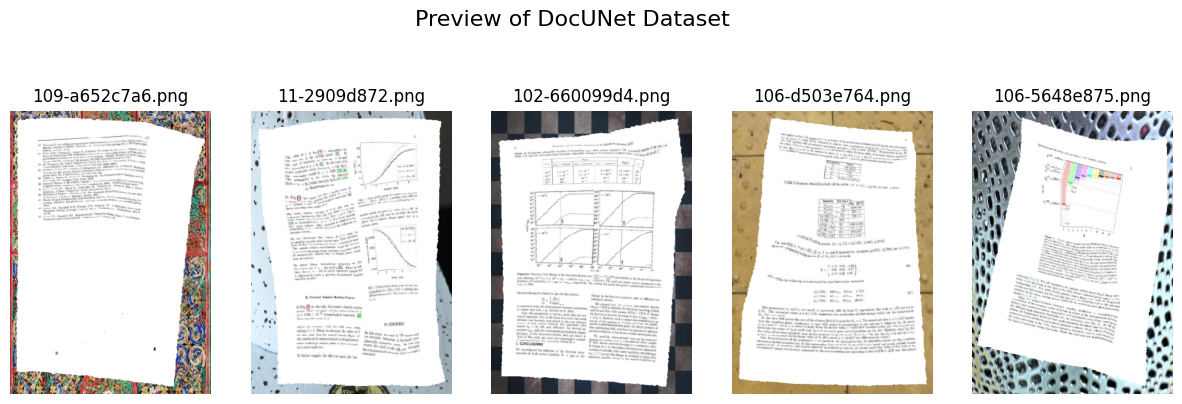

In [ ]:
# Display the first 5 images from each dataset
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images
def display_images(df, dataset_name, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(df))):
        img_path = df['filepath'].iloc[i]
        try:
            img = Image.open(img_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(os.path.basename(img_path))
            plt.axis('off')
        except Exception as e:
            print(f"Error displaying image {img_path}: {e}")
    plt.suptitle(f"Preview of {dataset_name} Dataset", fontsize=16)
    plt.show()

# Display images from SROIE dataset
display_images(sroie_df, "SROIE")

# Display images from DocUNet dataset
display_images(docunet_df, "DocUNet")


## merge dataset sroie & docunet

In [ ]:
import random

merged_df = pd.concat([sroie_df, docunet_df], ignore_index=True)

print("\nMerged Dataset:")
print(merged_df.head(20))

# Shuffle the merged DataFrame
merged_df = merged_df.sample(frac=1, random_state=random.seed(42)).reset_index(drop=True)

merged_df.to_csv("merged_dataset.csv", index=False)



Merged Dataset:
            filename                                       filepath     size  \
0   X51006414631.jpg  /content/SROIE2019/train/img/X51006414631.jpg  1441595   
1   X51005757346.jpg  /content/SROIE2019/train/img/X51005757346.jpg   409178   
2   X51005663276.jpg  /content/SROIE2019/train/img/X51005663276.jpg   539065   
3   X51006414700.jpg  /content/SROIE2019/train/img/X51006414700.jpg  2987461   
4   X51007846307.jpg  /content/SROIE2019/train/img/X51007846307.jpg  1629633   
5   X51007103675.jpg  /content/SROIE2019/train/img/X51007103675.jpg   359585   
6   X51006335547.jpg  /content/SROIE2019/train/img/X51006335547.jpg   334330   
7   X51006441474.jpg  /content/SROIE2019/train/img/X51006441474.jpg   243040   
8   X51006311764.jpg  /content/SROIE2019/train/img/X51006311764.jpg   530783   
9   X51005361895.jpg  /content/SROIE2019/train/img/X51005361895.jpg   553086   
10  X51005719902.jpg  /content/SROIE2019/train/img/X51005719902.jpg   282229   
11  X51005724629.jpg  /

In [ ]:
print(len(merged_df))

15698


# preprocess image

Processed 500 images
Processed 1000 images
Processed 1500 images
Processed 2000 images
Processed 2500 images
Processed 3000 images
Processed 3500 images
Processed 4000 images
Processed 4500 images
Processed 5000 images
Processed 5500 images
Processed 6000 images
Processed 6500 images
Processed 7000 images
Processed 7500 images
Processed 8000 images
Processed 8500 images
Processed 9000 images
Processed 9500 images
Processed 10000 images
Processed 10500 images
Processed 11000 images
Processed 11500 images
Processed 12000 images
Processed 12500 images
Processed 13000 images
Processed 13500 images
Processed 14000 images
Processed 14500 images
Processed 15000 images
Processed 15500 images
  original_filename                                original_filepath  \
0  109-2519980a.png  /content/DocUNet_dataset/image/109-2519980a.png   
1  102-4c606f7e.png  /content/DocUNet_dataset/image/102-4c606f7e.png   
2  X51006913055.jpg    /content/SROIE2019/train/img/X51006913055.jpg   
3  106-835d652c.png

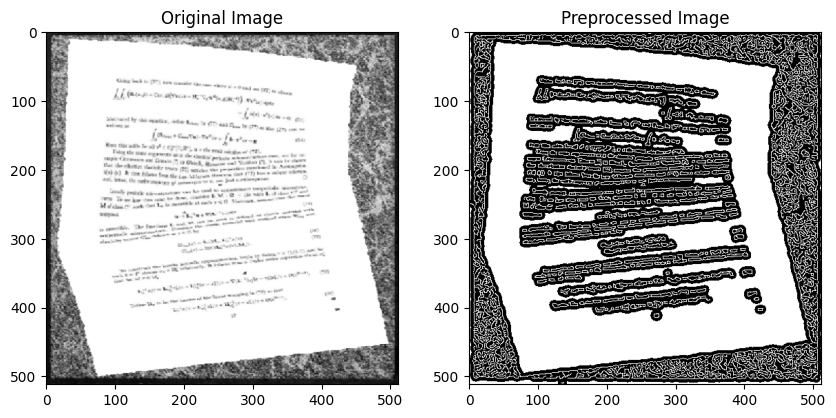

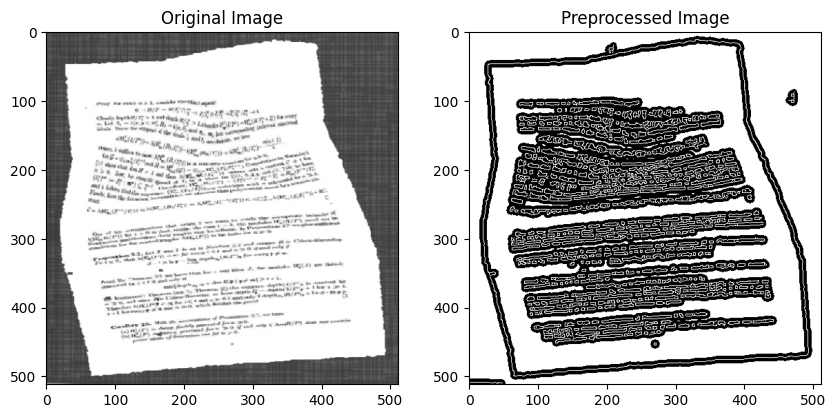

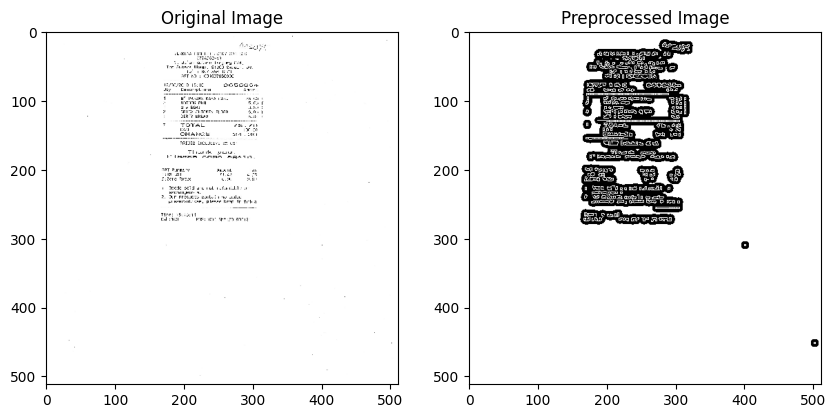

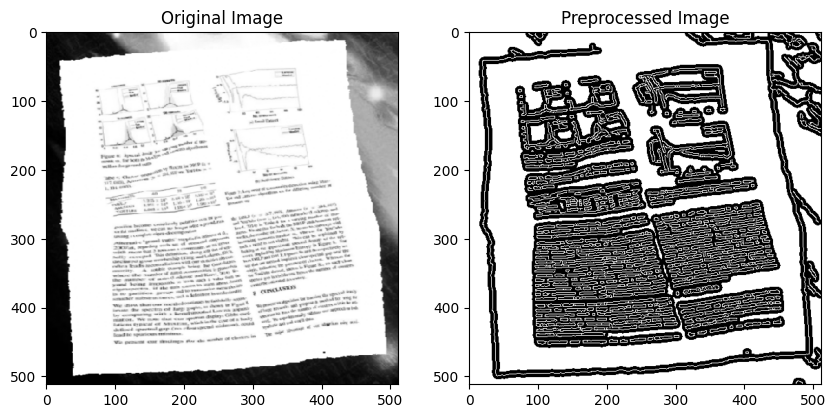

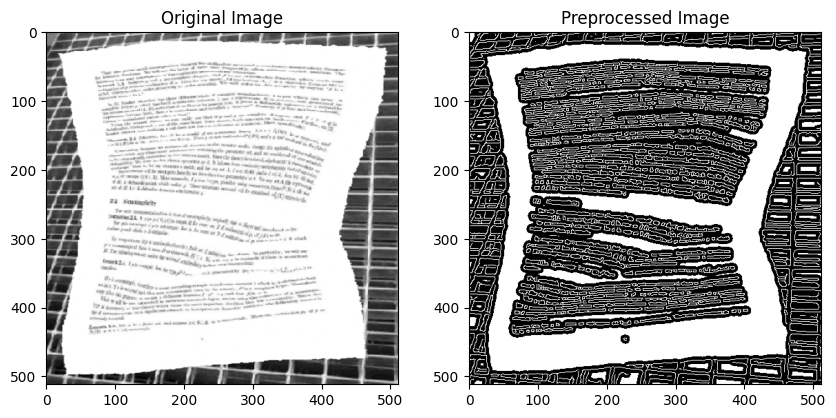

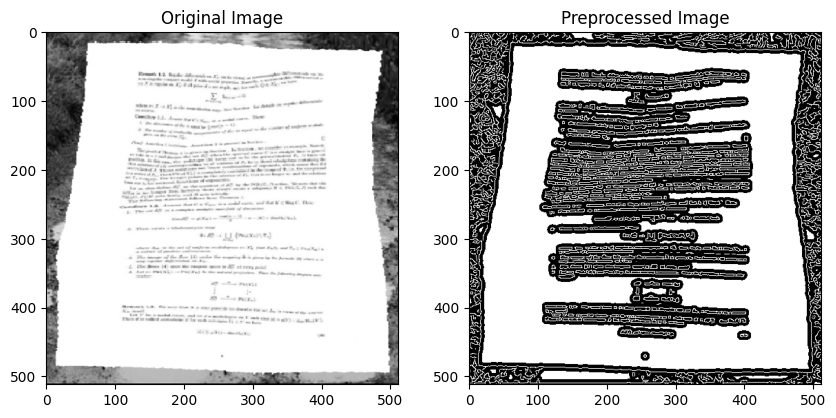

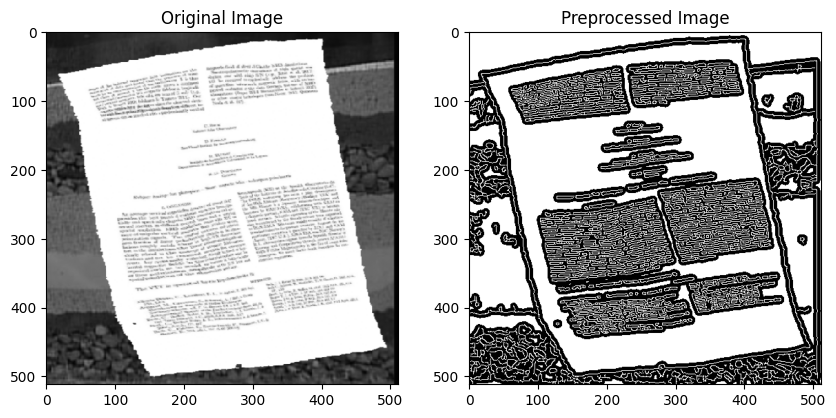

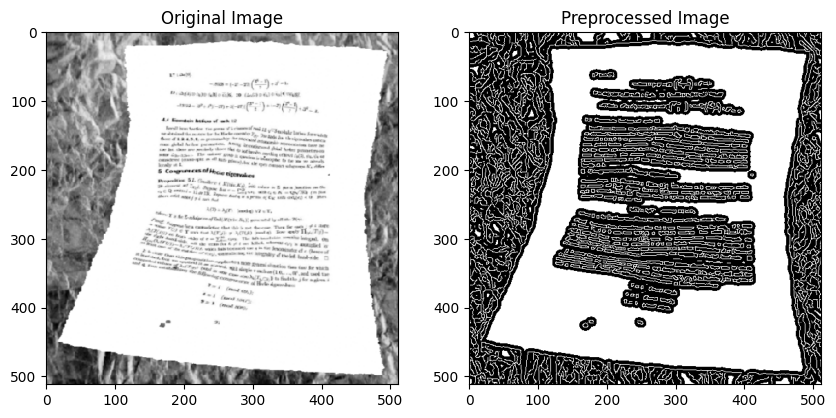

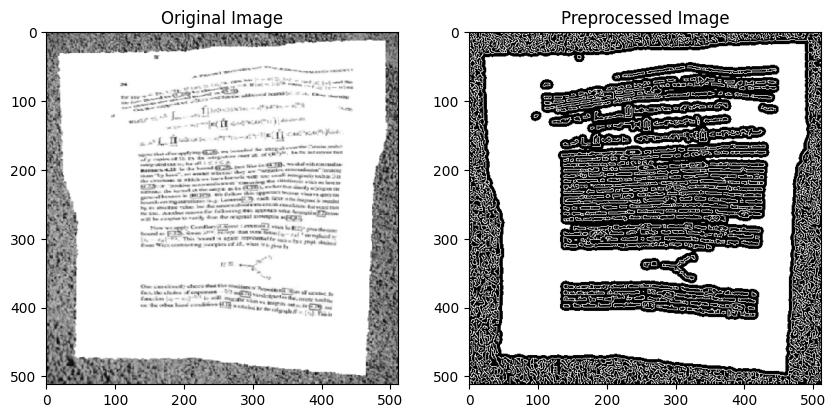

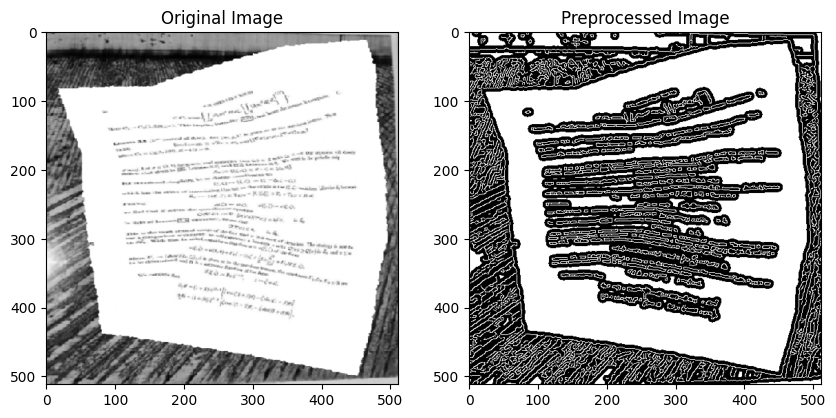

In [ ]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

def preprocess_image(image_path, save_dir):
    # Load the image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 512x512
    img = cv2.resize(img, (512, 512))

    # Normalize to [0, 1]
    img = img / 255.0

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(np.uint8(img * 255))
    img = img / 255.0

    # Denoising (Gaussian blur)
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Edge Detection (Canny)
    img = cv2.Canny(np.uint8(img * 255), 50, 150)
    img = img / 255.0

    # Binarization (Adaptive Thresholding)
    img = cv2.adaptiveThreshold(np.uint8(img*255), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 11, 2)
    img = img / 255.0

    # Create filename based on original filename
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    # Save only the final preprocessed image
    output_filename = f"{name}_preprocessed{ext}"
    cv2.imwrite(os.path.join(save_dir, output_filename), img*255)

    return img, output_filename

# Create the directory for preprocessed images
save_dir = "preprocessed_dataset"
os.makedirs(save_dir, exist_ok=True)

# Preprocess images and store information in preprocessed_df
preprocessed_data = []
for i in range(len(merged_df)):
    image_path = merged_df['filepath'][i]
    img, output_filename = preprocess_image(image_path, save_dir)

    preprocessed_data.append([
        merged_df['filename'][i],
        merged_df['filepath'][i],
        output_filename
    ])

    if (i + 1) % 500 == 0:
        print(f"Processed {i + 1} images")

# Create the preprocessed_df DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data,
                              columns=['original_filename', 'original_filepath', 'preprocessed_filename'])
preprocessed_df['preprocessed_filepath'] = preprocessed_df['preprocessed_filename'].apply(
    lambda x: os.path.join(save_dir, x))

print(preprocessed_df.head())

# --- Show the Visualization ---
for i in range(10):
    image_path = merged_df['filepath'][i]
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    original_img = cv2.resize(original_img, (512, 512))
    preprocessed_img, _ = preprocess_image(image_path, save_dir)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title('Preprocessed Image')

    plt.show()

In [ ]:
import os
from PIL import Image

preprocessed_image_dir = "preprocessed_dataset"

# Function to get image files from a folder
def get_images_from_folder(folder_path):
    image_files = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_files.append(os.path.join(root, file))
    return image_files


preprocessed_images = get_images_from_folder(preprocessed_image_dir)

print(f"Number of preprocessed images: {len(preprocessed_images)}")

for image_path in preprocessed_images[:5]:  # Check the shape of the first 5 images
    try:
      img = Image.open(image_path)
      width, height = img.size
      print(f"Image: {image_path}, Shape: ({width}, {height})")
    except Exception as e:
      print(f"Error processing {image_path}: {e}")


Number of preprocessed images: 15698
Image: preprocessed_dataset/106-33328fd3_preprocessed.png, Shape: (512, 512)
Image: preprocessed_dataset/103-d60eaa77_preprocessed.png, Shape: (512, 512)
Image: preprocessed_dataset/103-64d8dcb9_preprocessed.png, Shape: (512, 512)
Image: preprocessed_dataset/108-a77c5366_preprocessed.png, Shape: (512, 512)
Image: preprocessed_dataset/104-0a433c76_preprocessed.png, Shape: (512, 512)


# splitting dataset

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
preprocessed_image_dir = "preprocessed_dataset"
train_dir = "training_dataset"
val_dir = "validation_dataset"
test_dir = "testing_dataset"

# Create the directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get the list of preprocessed images
preprocessed_images = [f for f in os.listdir(preprocessed_image_dir) if os.path.isfile(os.path.join(preprocessed_image_dir, f))]

# Split the dataset (70% train, 15% validation, 15% test)
train_files, temp_files = train_test_split(preprocessed_images, test_size=0.3, random_state=42)
val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

# Copy the images to their respective folders
def copy_images(image_files, source_dir, destination_dir):
    for image_file in image_files:
        source_path = os.path.join(source_dir, image_file)
        destination_path = os.path.join(destination_dir, image_file)
        shutil.copy2(source_path, destination_path)

copy_images(train_files, preprocessed_image_dir, train_dir)
copy_images(val_files, preprocessed_image_dir, val_dir)
copy_images(test_files, preprocessed_image_dir, test_dir)

print(f"Training dataset size: {len(train_files)}")
print(f"Validation dataset size: {len(val_files)}")
print(f"Testing dataset size: {len(test_files)}")


Training dataset size: 10988
Validation dataset size: 2355
Testing dataset size: 2355


# image augmentation

In [ ]:
!pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 18.3 MB/s eta 0:00:00


In [ ]:
!pip install imgaug --upgrade

Copying original training images: 100%|██████████| 10988/10988 [00:02<00:00, 4259.89it/s]


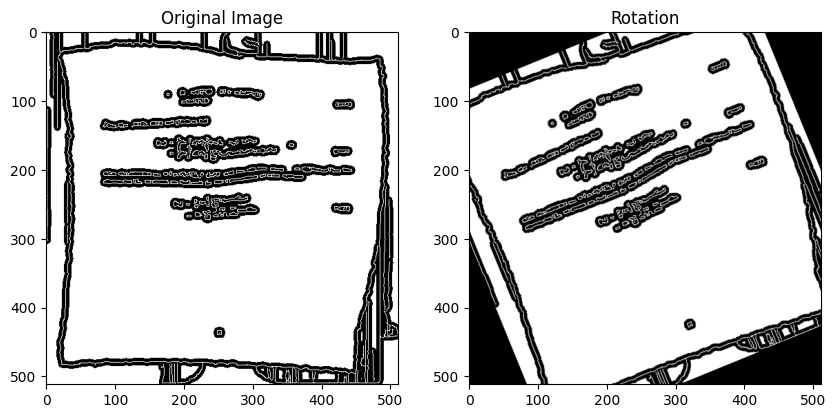

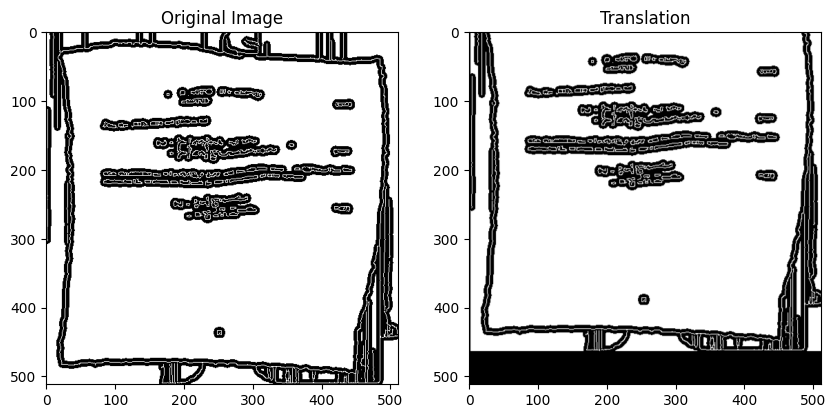

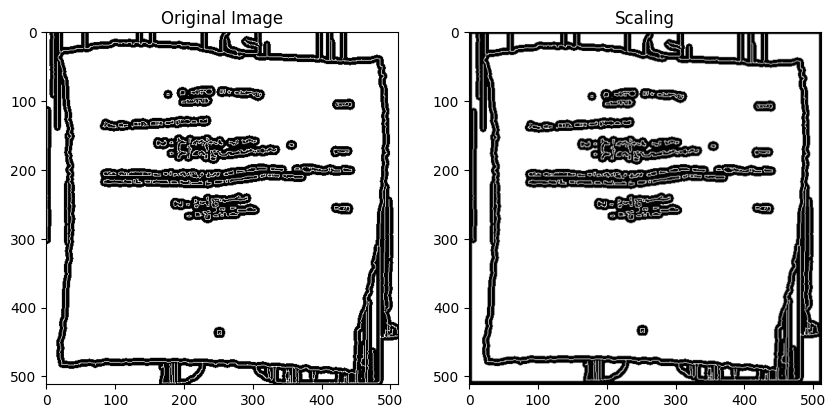

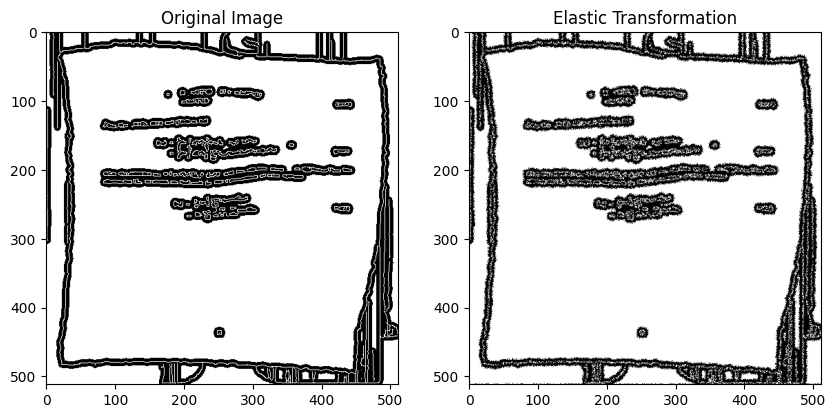

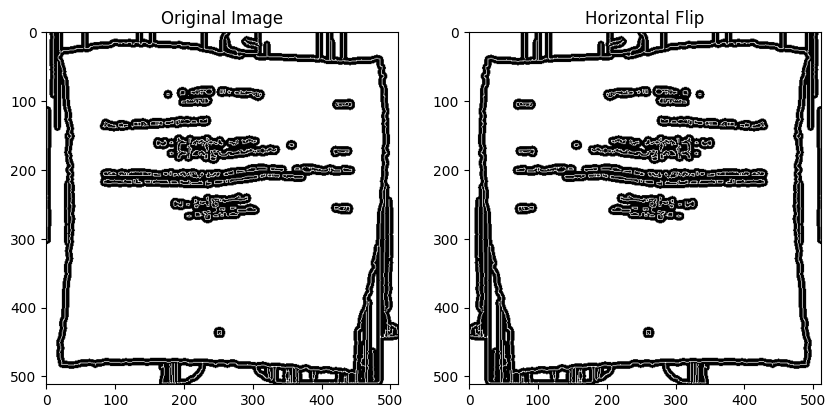

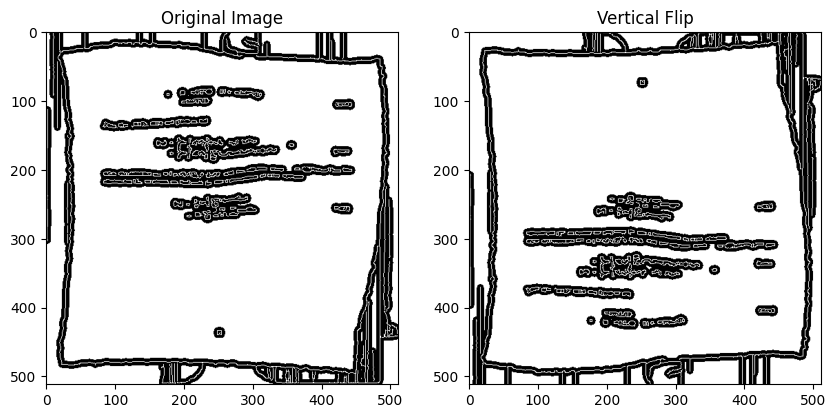

In [ ]:
# prompt: code to augment the 1/2 'training_dataset' (only training dataset, dont touch the testing and validation dataset). so the training dataset is 10988, then augment randomly the 5494 pics, and make save it on new folder. give me the tqdm so i can see the progress
# - (rotate=(-30, 30)),
# - (translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),
# - scale=(0.5, 1.5)),
# - ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
# - Fliplr(1.0),
# - Flipud(1.0)

from imgaug import augmenters as iaa
from tqdm import tqdm
import os
import random
import shutil

# Define augmentation sequence
augmentations = [
    iaa.Affine(rotate=(-30, 30)),
    iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),
    iaa.Affine(scale=(0.5, 1.5)),
    iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
    iaa.Fliplr(1.0),
    iaa.Flipud(1.0)
]

augmentation_names = [
    "Rotation",
    "Translation",
    "Scaling",
    "Elastic Transformation",
    "Horizontal Flip",
    "Vertical Flip"
]

# Define paths
train_dir = "training_dataset"
augmented_train_dir = "augmented_training_dataset"

# Create augmented training directory
os.makedirs(augmented_train_dir, exist_ok=True)

# Get training images
train_images = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]
image_file = random.choice(train_images)
image_path = os.path.join(train_dir, image_file)
num_images_to_augment = len(train_images) // 2

# Augment images
for image_file in tqdm(random.sample(train_images, num_images_to_augment), desc="Augmenting images"):
    image_path = os.path.join(train_dir, image_file)
    try:
      image = cv2.imread(image_path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      images_aug = seq(images=[image])
      augmented_image = images_aug[0]
      augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)
      augmented_image_path = os.path.join(augmented_train_dir, f"augmented_{image_file}")
      cv2.imwrite(augmented_image_path, augmented_image)

    except Exception as e:
      print(f"Error augmenting {image_path}: {e}")

# Copy original training images to augmented directory
for image in tqdm(train_images, desc = "Copying original training images"):
  original_image_path = os.path.join(train_dir, image)
  augmented_image_path = os.path.join(augmented_train_dir, image)
  shutil.copy2(original_image_path, augmented_image_path)

# Preview each augmentation
for i, augmentation in enumerate(augmentations):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    augmented_image = augmentation(image=image)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(augmented_image)
    plt.title(augmentation_names[i])

    plt.show()


In [ ]:
augmented_train_dir = "augmented_training_dataset"
augmented_images = [f for f in os.listdir(augmented_train_dir) if os.path.isfile(os.path.join(augmented_train_dir, f))]
print(f"Number of images in augmented_training_dataset: {len(augmented_images)}")

Number of images in augmented_training_dataset: 20652


# define model

In [ ]:
!pip install --upgrade jax
!pip install --upgrade tensorflow
!pip install ml_dtypes==0.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 99.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
  Attempting uninstall: jax
    Found existing installation: jax 0.5.2
    Uninstalling jax-0.5.2:
      Successfully uninstalled jax-0.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 w

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Activation, Multiply, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import Mean
from tensorflow.image import ssim, psnr
import cv2

In [ ]:
# Define the residual block
def residual_block(x, filters):
    # First convolution layer
    conv1 = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    conv1 = Activation('relu')(conv1)

    # Second convolution layer
    conv2 = Conv2D(filters, kernel_size=(3, 3), padding='same')(conv1)
    conv2 = Activation('relu')(conv2)

    # Skip connection
    skip = Add()([x, conv2])
    return skip

# Define the attention mechanism
def attention_block(x, g, filters):
    # Query and Key
    theta_x = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    phi_g = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(g)

    # Add and apply ReLU
    add_xg = Add()([theta_x, phi_g])
    add_xg = Activation('relu')(add_xg)

    # Attention map
    psi = Conv2D(1, kernel_size=(1, 1), strides=(1, 1), padding='same')(add_xg)
    psi = Activation('sigmoid')(psi)

    # Apply attention
    return Multiply()([x, psi])


# Define the DocUNet model
def build_docunet(input_shape=(512, 512, 1)):
    inputs = Input(input_shape)

    # Encoder
    x = Conv2D(64, kernel_size=(3, 3), padding='same')(inputs)
    x = Activation('relu')(x)
    x = residual_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = residual_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = residual_block(x, 256)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = residual_block(x, 512)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Bottleneck with attention mechanism
    g = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
    g = Activation('relu')(g)
    g = attention_block(g, x, 512)

    # Decoder
    x = Conv2DTranspose(512, kernel_size=(3, 3), strides=(2, 2), padding='same')(g)
    x = concatenate([x, residual_block(x, 512)])
    x = Activation('relu')(x)

    x = Conv2DTranspose(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, residual_block(x, 256)])
    x = Activation('relu')(x)

    x = Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, residual_block(x, 128)])
    x = Activation('relu')(x)

    x = Conv2DTranspose(64, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, residual_block(x, 64)])
    x = Activation('relu')(x)

    # Output layer
    outputs = Conv2D(1, kernel_size=(1, 1), activation='sigmoid')(x)

    # Build the model
    model = Model(inputs, outputs)
    return model

# Compile the model
model = build_docunet()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 512, 512, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_50 (Conv2D)        │ (None, 512, 512, 64)   │            640 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_54             │ (None, 512, 512, 64)   │              0 │ conv2d_50[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_51 (Conv2D)        │ (None, 512, 512, 64)   │         36,928 │ activation_54[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_55             │ (None, 512, 512, 64)   │              0 │ conv2d_51[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_52 (Conv2D)        │ (None, 512, 512, 64)   │         36,928 │ activation_55[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_56             │ (None, 512, 512, 64)   │              0 │ conv2d_52[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_18 (Add)              │ (None, 512, 512, 64)   │              0 │ activation_54[0][0],   │
│                           │                        │                │ activation_56[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 256, 256, 64)   │              0 │ add_18[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_53 (Conv2D)        │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_57             │ (None, 256, 256, 128)  │              0 │ conv2d_53[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_54 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ activation_57[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_58             │ (None, 256, 256, 128)  │              0 │ conv2d_54[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ activation_58[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_59             │ (None, 256, 256, 128)  │              0 │ conv2d_55[0][0]        │
│ (Activation)              │                        │                │                        │
├──────────────────────

 Total params: 22,430,018 (85.56 MB)

 Trainable params: 22,430,018 (85.56 MB)

 Non-trainable params: 0 (0.00 B)

# running model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for the datasets
train_dir = 'augmented_training_dataset'
val_dir = 'validation_dataset'
test_dir = 'testing_dataset'

# Create subfolders
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(os.path.join(directory, 'images'), exist_ok=True)

# Move images to subfolders
def move_images_to_subfolder(directory):
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            source_path = os.path.join(directory, filename)
            destination_path = os.path.join(directory, 'images', filename)
            os.rename(source_path, destination_path)

move_images_to_subfolder(train_dir)
move_images_to_subfolder(val_dir)
move_images_to_subfolder(test_dir)


image_size = (512, 512)
batch_size = 16
epochs = 20
patience = 10

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)


# Data generators for loading and augmenting images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training, validation, and testing data using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='input',
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='input',
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='input',
    seed=42
)

# Train the model, using the numpy_to_tensor function to convert data
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set, using the numpy_to_tensor function to convert data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 16482 images belonging to 1 classes.
Found 2355 images belonging to 1 classes.
Found 2355 images belonging to 1 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


InternalError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INTERNAL:  Unexpected PyObject was returned: numpy.ndarray
	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_4]]
  (1) INTERNAL:  Unexpected PyObject was returned: numpy.ndarray
	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_multi_step_on_iterator_11955]

# eval model

In [ ]:
val_loss = model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
print(f"Validation Loss: {val_loss}")

test_loss = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(f"Test Loss: {test_loss}")

y_test_pred = model.predict(X_test, batch_size=batch_size)
test_ssim = tf.reduce_mean(ssim(y_test, y_test_pred, max_val=1.0))
test_psnr = tf.reduce_mean(psnr(y_test, y_test_pred, max_val=1.0))
print(f"Test SSIM: {test_ssim.numpy()}, Test PSNR: {test_psnr.numpy()}")

# save model

In [ ]:
model.save("ta_ileene.h5")